## DAG: Content Abuse - Al-Jazeera 

In [2]:
from graphviz import Digraph

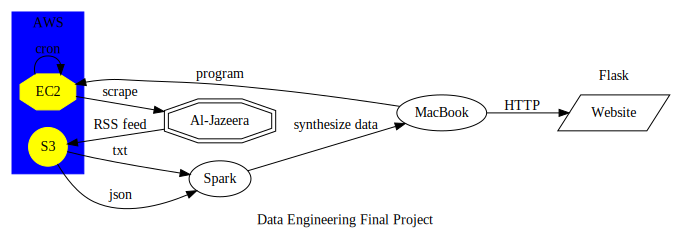

In [4]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Data Engineering Final Project"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=blue')
aws.node_attr.update(style='filled', color='yellow')
aws.body.append('label = "AWS"')
aws.node('EC2', shape='octagon')
aws.node('S3', shape='circle')

g.subgraph(aws)

g.node('Al-Jazeera', shape='doubleoctagon')
g.edge('EC2', 'EC2', 'cron')
g.edge('EC2', 'Al-Jazeera', 'scrape')
g.edge('Al-Jazeera', 'S3', 'RSS feed')
g.edge('S3', 'Spark', 'json')
g.edge('S3', 'Spark', 'txt')

mac = Digraph('cluster_1')
mac.body.append('style=filled')
mac.body.append('label = Flask')
mac.node('Website', shape='parallelogram')
mac.body.append('color=white')

g.subgraph(mac)
g.edge('MacBook', 'Website','HTTP')
g.edge('Spark', 'MacBook', 'synthesize data')

home = Digraph('cluster_2')
home.body.append('style=filled')
home.body.append('label = Internet')
home.node('MacBook', shape='square')
home.body.append('color=white')

g.subgraph(aws)
g.edge('MacBook','EC2','program')
g

1. This project streams data from al-Jazeera and Twitter, stores raw data in S3, structurs a subset of this data in S3, transforms the data and applies machine learning in Spark, and shows the results on a website. 

2. Robustness: This system is robust by not over complicating the architecture from beginning to end. Low Latency: I tried to reduce latency by doing much of the machine learning in Spark as opposed to pulling to from S3 and processing it on my local. Scalability: This architecture could be scaled to include many other websites still pouring into S3 and analyzed in spark. Generalization: this architecutre could easily provide analysis on another topic such as health care or finance with a change in website and the feed analysis from twitter. Extensible: I believe the system is fairly extensible in that it is not trying to create a new architecture for something fairly simple. Ad hoc: Hypothetically, this architecture will allow for ad hoc queries although I am not sure I will have the time to set that up in a robust way.  My goal is for the output to provide enough analysis and the machine learning model to be robust enough that it can predict the majority of trolls and monitor how many frequent the website. Maintenance: In general I think this architecture requires little maintenance. Debugging: Depends on how well I code.  If I choose a more functional approach or an ad-hoc lets get the job done approach. 

3. I think the two major issues I foresee with my project is debuggability as well as ad hoc queries.  Both of them require a lot of time when designing the original architecture which I do not have in a 8 week term for this project.  However, in future iterations of this project this would be an excellent area to improve the extensibility and generalization of the project across different domains. 